In [80]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt     
import numpy as np                      
from scipy.sparse import csr_matrix     
%matplotlib inline

In [81]:
csv_file = 'Downloads/Kaggle Sample Data/DataAnalystJobs.csv'
names = ['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Industry', 'Sector', 'Revenue' ]

In [82]:
rawdata = read_csv(csv_file, names=names)

In [83]:
# Basic overview of the first 10 columns in the data file
rawdata.head(10)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,Insurance Carriers,Insurance,$100 to $500 million (USD)
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD)
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,Research & Development,Business Services,Unknown / Non-Applicable


In [84]:
# Getting the average rating at a data science/analyst position
rawdata["Rating"].mean()

3.160630270750119

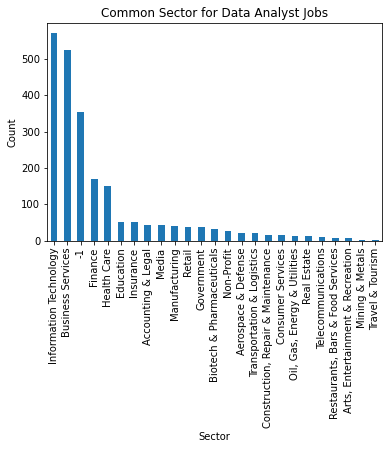

In [90]:
chart = rawdata['Sector'].value_counts().plot(kind='bar', title="Common Sectors for Data Analyst Jobs")
chart.set_xlabel("Sector")
chart.set_ylabel("Count")
plt.show()

In [86]:
# Minimum rating for a position. Note that a rating of -1 is assumed to be where no information was available
rawdata['Rating'].min()

-1.0

In [87]:
# Max rating of a position (out of 5)
rawdata['Rating'].max()

5.0

In [70]:
# Information on the top rated data analyst job
rawdata.loc[rawdata['Rating'].idxmax()]

Job Title          Data + Business Intelligence Analyst
Salary Estimate              $37K-$66K (Glassdoor est.)
Rating                                                5
Company Name                              Duolingo\n5.0
Location                                   New York, NY
Headquarters                             Pittsburgh, PA
Size                               201 to 500 employees
Industry                                       Internet
Sector                           Information Technology
Revenue                        $10 to $25 million (USD)
Name: 26, dtype: object

In [88]:
# Information on one of the lowest rated jobs
rawdata.loc[rawdata['Rating'].idxmin()]

# After interpreting this, we can see that it is just missing inputs 

Job Title                        Data Analyst
Salary Estimate    $37K-$66K (Glassdoor est.)
Rating                                     -1
Company Name                         BulbHead
Location                        Fairfield, NJ
Headquarters                               -1
Size                        1 to 50 employees
Industry                                   -1
Sector                                     -1
Revenue              Unknown / Non-Applicable
Name: 11, dtype: object

In [89]:
# Counts of the different values in the 'Sector' column 
print(rawdata.groupby('Sector').size())

# Note that sector '-1' simply means no information was reported 

Sector
-1                                    353
Accounting & Legal                     43
Aerospace & Defense                    22
Arts, Entertainment & Recreation        7
Biotech & Pharmaceuticals              33
Business Services                     524
Construction, Repair & Maintenance     16
Consumer Services                      14
Education                              52
Finance                               169
Government                             36
Health Care                           151
Information Technology                570
Insurance                              51
Manufacturing                          40
Media                                  42
Mining & Metals                         1
Non-Profit                             26
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Restaurants, Bars & Food Services       8
Retail                                 38
Telecommunications                     11
Transportation & Logistics 

In [93]:
# Printing top 10 industries 
print(rawdata.groupby('Industry').size().nlargest(10))

Industry
-1                                         353
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Computer Hardware & Software               111
Consulting                                 111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
dtype: int64


In [95]:
# Printing top 10 job locations 
print(rawdata.groupby('Location').size().nlargest(10))

Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
dtype: int64


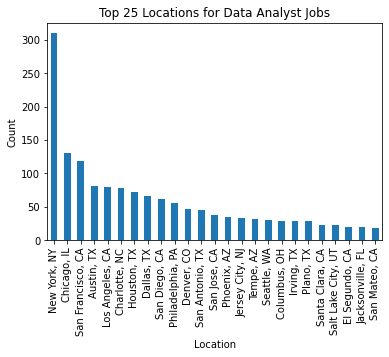

In [100]:
# Bar chart on the top 25 job locations 
chart2 = rawdata['Location'].value_counts().nlargest(25).plot(kind='bar', title="Top 25 Locations for Data Analyst Jobs")
chart2.set_xlabel("Location")
chart2.set_ylabel("Count")
plt.show()

In [112]:
# Print out the top 5 occuring salary bracket to understand a sort of common/average pay 
common_pay = rawdata.groupby('Salary Estimate').size().nlargest(5)
print(common_pay)

Salary Estimate
$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
dtype: int64


In [119]:
print(rawdata.groupby('Size').size())

Size
-1                         163
1 to 50 employees          347
10000+ employees           375
1001 to 5000 employees     348
201 to 500 employees       249
5001 to 10000 employees     97
501 to 1000 employees      211
51 to 200 employees        421
Unknown                     42
dtype: int64


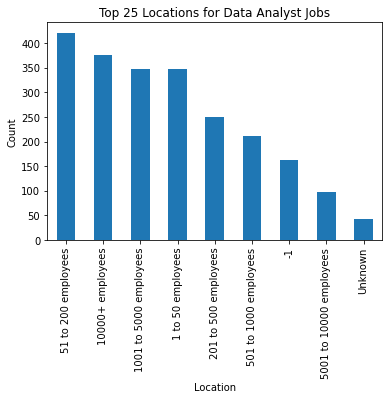

In [121]:
# Breakdown of company size 
chart3 = rawdata['Size'].value_counts().plot(kind='bar', title="Top 25 Locations for Data Analyst Jobs")
chart3.set_xlabel("Location")
chart3.set_ylabel("Count")
plt.show()

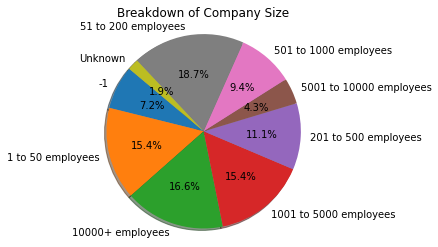

In [141]:
# Breakdown of Company Size 
frequency = rawdata.groupby(["Size"]).size()
plt.pie(frequency, labels=sums.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Company Size")
plt.axis('equal')
plt.show()

In [143]:
rawdata

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,Wholesale,Business Services,$10+ billion (USD)
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD)


In [145]:
New_York = rawdata[rawdata.Location == 'New York, NY']

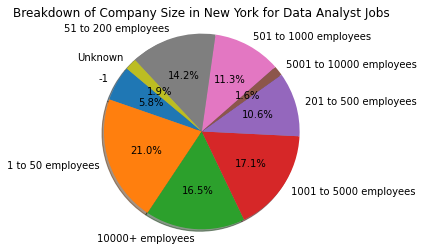

In [151]:
# Pie chart of company sizes 
frequency2 = New_York.groupby(["Size"]).size()
plt.pie(frequency2, labels=sums.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Company Size in New York for Data Analyst Jobs")
plt.axis('equal')
plt.show()

In [153]:
# List of the top 10 companies that employ data analysts according to this survey 
print(rawdata.groupby('Company Name').size().nlargest(10))

Company Name
Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
Avacend, Inc.\n2.5                       13
Mondo\n3.9                               11
Apex Systems\n3.8                        10
Apple\n4.1                               10
eTeam Inc.\n3.7                          10
dtype: int64


In [155]:
# Top 10 companies that employ data analaysts in New York according to this survey 
print(New_York.groupby('Company Name').size().nlargest(10))

Company Name
Reliable Software Resources\n4.0         8
Diverse Lynx\n3.9                        6
Perficient\n3.6                          5
Praescient Analytics\n3.1                5
Mount Sinai Medical Center\n3.1          4
NYU Langone Health\n4.0                  4
Staffigo Technical Services, LLC\n5.0    4
Citi\n3.7                                3
Lorven Technologies Inc\n4.0             3
Mount Sinai Health System\n3.4           3
dtype: int64


In [163]:
# Comparing New York's rating with the entire data
print(New_York["Rating"].mean())
print(rawdata["Rating"].mean())

3.1416129032258064
3.160630270750119


In [169]:
# Job titles that were used for this data file 
titles = rawdata.groupby('Job Title').size().nlargest(10)
print(titles)

Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst II             17
Data Analyst Junior         17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
dtype: int64


In [175]:
# Table of company revenue yearly 
print(rawdata.groupby('Revenue').size())

Revenue
$1 to $2 billion (USD)               87
$1 to $5 million (USD)              111
$10 to $25 million (USD)            132
$10+ billion (USD)                  189
$100 to $500 million (USD)          218
$2 to $5 billion (USD)              129
$25 to $50 million (USD)            110
$5 to $10 billion (USD)              56
$5 to $10 million (USD)              72
$50 to $100 million (USD)           199
$500 million to $1 billion (USD)     79
-1                                  163
Less than $1 million (USD)           93
Unknown / Non-Applicable            615
dtype: int64


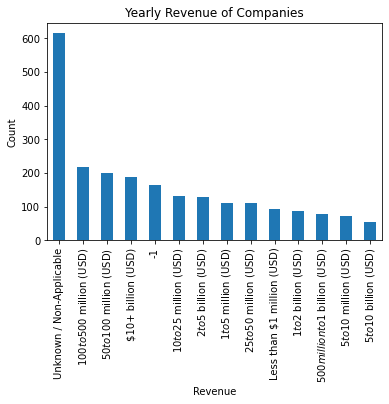

In [176]:
# Breakdown of company revenue 
chart4 = rawdata['Revenue'].value_counts().plot(kind='bar', title="Yearly Revenue of Companies")
chart4.set_xlabel("Revenue")
chart4.set_ylabel("Count")
plt.show()